In [2]:
import os
import pickle
from loguru import logger
from CQA.core.concept_quality import CONCEPT_QUALITY
from CQA.utils.args_utils import load_args_from_path
from CQA.core.concept_quality import initialize_CQA_v2
from CQA.config import CONCEPT_SETS
from CQA.config import ACTIVATIONS_PATH
import sys

logger.remove()  # Remove the default handler
logger.add(sys.stderr, level="INFO")  # Add handler with INFO level

FOLDER = '/mnt/cimec-storage6/users/nicola.debole/home/CQA/ordered_models'

DATASETS = ['celeba', 'cub', 'shapes3d']
MODELS = ['labo', 'lfcbm', 'oracle', 'resnetcbm', 'vlgcbm']

for d in DATASETS:
    for m in MODELS:
        path = os.path.join(FOLDER,d,m)
        runs = os.listdir(path)
        for r in runs:
            m_path = os.path.join(path, r)
            args = load_args_from_path(os.path.join(m_path))
            args.force = False
            args.activation_dir = '/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/activations'
            ACTIVATIONS_PATH['shared'] = args.activation_dir
            args.concept_set = CONCEPT_SETS[d]
            args.eval_seed = 10
            CQA = initialize_CQA_v2(args.load_dir, args, split = 'test')
            print(CQA)
            CQA.DCI(0.8)
            print(CQA.dci['disentanglement'])
            CQA.save()
            #with open(os.path.join(m_path,'CQA.pkl'), 'rb') as f:   
            #        CQA = CONCEPT_QUALITY()
            sd
            

2025-06-20 17:13:57.964 | INFO     | CQA.core.concept_quality:initialize_CQA_v2:271 - CQA found. Loading CQA.
2025-06-20 17:14:07.644 | INFO     | CQA.core.concept_quality:save:67 - Saved to /mnt/cimec-storage6/users/nicola.debole/home/CQA/ordered_models/celeba/labo/labo_celeba_2025_03_10_10_31/CQA.pkl
2025-06-20 17:14:07.659 | INFO     | CQA.metrics.dci_framework:compute_importance_gbt:68 - Factors: 39, Concepts: 39


Computing DCI:   3%|▎         | 1/39 [00:30<19:00, 30.02s/it]


KeyboardInterrupt: 

In [1]:
import os
import pickle
from loguru import logger
from CQA.core.concept_quality import CONCEPT_QUALITY
from CQA.utils.args_utils import load_args_from_path
from CQA.core.concept_quality import initialize_CQA_v2
from CQA.config import CONCEPT_SETS
from CQA.config import ACTIVATIONS_PATH
import sys

logger.remove()  # Remove the default handler
logger.add(sys.stderr, level="INFO")  # Add handler with INFO level

FOLDER = '/mnt/cimec-storage6/users/nicola.debole/home/CQA/ordered_models'

DATASETS = ['cub']
MODELS = ['resnetcbm']

for d in DATASETS:
    for m in MODELS:
        path = os.path.join(FOLDER,d,m)
        runs = os.listdir(path)
        for r in runs:
            m_path = os.path.join(path, r)
            args = load_args_from_path(os.path.join(m_path))
            args.force = True
            args.activation_dir = '/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/activations'
            ACTIVATIONS_PATH['shared'] = args.activation_dir
            args.concept_set = CONCEPT_SETS[d]
            args.eval_seed = 10
            CQA = initialize_CQA_v2(args.load_dir, args, split = 'test')
            #CQA.get_classification_report()
            #CQA.concept_metrics()
            #CQA.save()
            CQA.compute_leakage()
            #CQA.save()
            #CQA.compute_ois()
            #CQA.save()
            #CQA.DCI(0.8)
            #CQA.save()
            #CQA.dump_metrics()
            #logger.info(f"{d}-{m}")

2025-06-26 11:35:32.479 | DEBUG    | CQA.datasets:<module>:19 - Available datasets: {'chestmnist': <class 'CQA.datasets.dataset_classes.CHESTMINST_Dataset'>, 'cub': <class 'CQA.datasets.dataset_classes.CUBDataset'>, 'celeba': <class 'CQA.datasets.dataset_classes.CelebA'>, 'celeba_mini': <class 'CQA.datasets.dataset_classes.CelebAMini'>, 'celeba_original': <class 'CQA.datasets.dataset_classes.CelebAOriginal'>, 'cifar10': <class 'CQA.datasets.dataset_classes.Cifar10Custom'>, 'shapes3d_mini': <class 'CQA.datasets.dataset_classes.SHAPES3DMini'>, 'shapes3d_original': <class 'CQA.datasets.dataset_classes.SHAPES3DOriginal'>, 'shapes3d': <class 'CQA.datasets.dataset_classes.SHAPES3D_Custom'>}
2025-06-26 11:35:34.823 | DEBUG    | CQA.models:<module>:24 - Available models: {'oracle': <class 'CQA.models.oracle.ORACLE'>, 'vlgcbm': <class 'CQA.models.vlgcbm.VLGCBM'>, 'labo': <class 'CQA.models.labo.LABO'>, 'lfcbm': <class 'CQA.models.lfcbm.LFCBM'>, 'resnetcbm': <class 'CQA.models.resnetcbm.RESNETCB

KeyboardInterrupt: 

In [2]:
import numpy as np
def compute_leakage_from_f1s(accuracies_gt,accuracies_pred):
    increase = []
    delta = []
    old = 0
    accuracies_gt = np.array(accuracies_gt)
    accuracies_pred = np.array(accuracies_pred)
    max_f1_gt = np.max(accuracies_gt)
    k = len(accuracies_gt)
    Z = 1-np.mean(accuracies_gt)
    gap = np.sum(np.maximum(accuracies_pred-accuracies_gt,0))
    leak = gap/(k*Z)
    return leak



In [45]:
import os
import pickle
import json
import pandas as pd
import numpy as np


def compute_leakage_from_f1s(accuracies_gt,accuracies_pred):
    increase = []
    delta = []
    old = 0
    accuracies_gt = np.array(accuracies_gt)
    accuracies_pred = np.array(accuracies_pred)
    max_f1_gt = np.max(accuracies_gt)
    k = len(accuracies_gt)
    Z = 1-np.mean(accuracies_gt)
    gap = np.sum(np.maximum(accuracies_pred-accuracies_gt,0))
    leak = gap/(k*Z)
    return leak



# Create an empty list to hold all records
records = []

single_values = []
folder = 'rebuttal_models'
FOLDER = f'/mnt/cimec-storage6/users/nicola.debole/home/CQA/{folder}'
#DATASET = 'cub'
#MODEL = 'labo'
for DATASET in ['celeba','shapes3d','cub']:
    try:
        for MODEL in ['labo','lfcbm','oracle','vlgcbm','resnetcbm']:
            succ = 0
            failed = 0
            path = os.path.join(FOLDER)
            runs = os.listdir(path)
            r_path = os.path.join(FOLDER,DATASET,MODEL)
            runs = os.listdir(r_path)
            all_data = []
            leakage = {'resnetcbm':[],'oracle':[],'labo':[],'lfcbm':[],'vlgcbm':[]}
            leakage_metric = {}
            for r in runs:
                m_path = os.path.join(r_path,r)
                files = os.listdir(m_path)
                #print(files)
                with open(os.path.join(m_path,'metrics.txt'), 'r') as f:
                    try:
                        content = json.load(f)
                        all_data.append(content)
                        lkg_info = pickle.load(open(os.path.join(m_path,"leakage.data"), 'rb'))
                        leakage[MODEL].append(compute_leakage_from_f1s(lkg_info['f1_gt'],lkg_info['f1_pred']))
                        #print(content)
                        succ +=1
                    except:
                        failed +=1
                    
            # Example: Assuming each JSON is a dict with the same numeric keys/structure
            # Example data structure: {"accuracy": 0.9, "loss": 0.2}
            averaged = {}

                    
            for model in leakage.keys():
                res = np.array(leakage[model])
                leakage_metric[model] = (np.mean(res),np.std(res),res.shape)
                for i,v in enumerate(leakage[model]):
                    single_values.append({'dataset': DATASET,
                                'model': MODEL,
                                'metric': 'leakage',
                                'value': v,
                                'run':i,
                                })
                    
            # Initialize keys
            for key in all_data[0]:
                values = [d[key] for d in all_data if key in d]
                averaged[key] = sum(values) / len(values)
                if key in ['label_f1', 'avg_concept_auc','disentanglement','ois']:
                    print(key, sum(values) / len(values))
                    records.append({'dataset': DATASET,
                            'model': MODEL,
                            'metric': key,
                            'value': sum(values) / len(values)
                            })
                    for i,v in enumerate(values):
                        single_values.append({'dataset': DATASET,
                                'model': MODEL,
                                'metric': key,
                                'value': v,
                                'run':i,
                                })
                    
            print('leakage', float(leakage_metric[MODEL][0]), float(leakage_metric[MODEL][1]))    
            records.append({'dataset': DATASET,
                            'model': MODEL,
                            'metric': 'leakage',
                            'value': float(leakage_metric[MODEL][0])
                            })
            
            
            print("Averaged results:")
            print(succ)
            print(failed)
    except:
        continue
        
df = pd.DataFrame(records)
df.to_csv(f'{folder}_results.csv', index=True, sep=';')
singe_runs = pd.DataFrame(single_values)
singe_runs.to_csv(f'{folder}_all_runs.csv', index=True, sep=';')
print(f'{folder}_all_runs.csv')

label_f1 0.9740667355650006
avg_concept_auc 0.3814020667072681
ois 0.163687065243721
disentanglement 0.2804863482728319
leakage 0.4781152171586499 5.551115123125783e-17
Averaged results:
10
0
label_f1 0.987361881109487
avg_concept_auc 0.41428209794783966
ois 0.16003351509571076
disentanglement 0.29372270386304017
leakage 0.5938692962663312 0.009717419648940647
Averaged results:
10
0
label_f1 0.970200698387713
avg_concept_auc 0.5194460347838243
ois 0.15505489259958266
disentanglement 0.38364701197304624
leakage 0.7555391606434714 0.02081799681681363
Averaged results:
10
0
label_f1 0.9839976383612704
avg_concept_auc 0.3058176448813346
ois 0.18535949736833573
disentanglement 0.1693296832965247
leakage 0.9043246012725321 0.02435481000216735
Averaged results:
10
0
label_f1 0.9516423427599807
avg_concept_auc 0.7425862031139292
ois 0.12634795159101486
disentanglement 0.7468864627225524
leakage 0.5055752235074774 0.010998574015561327
Averaged results:
10
0
label_f1 0.7644400514912842
avg_conce

/home/nicola.debole/miniconda3/envs/vlm/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nicola.debole/miniconda3/envs/vlm/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/nicola.debole/miniconda3/envs/vlm/lib/python3.12/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nicola.debole/miniconda3/envs/vlm/lib/python3.12/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/nicola.debole/miniconda3/envs/vlm/lib/python3.12/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [52]:
# All values for a specific model and dataset
df[(df['dataset'] == 'dataset1') & (df['model'] == 'modelA')]

# Pivot to see metrics in columns
df.pivot(index=['dataset', 'model'], columns='metric', values='value')


metric              avg_concept_auc  disentanglement  label_f1   leakage  \
dataset  model                                                             
celeba   labo              0.381402         0.280486  0.974067  0.478115   
         lfcbm             0.414282         0.293723  0.987362  0.593869   
         oracle            0.519446         0.383647  0.970201  0.755539   
         resnetcbm         0.742586         0.746886  0.951642  0.505575   
         vlgcbm            0.305818         0.169330  0.983998  0.904325   
shapes3d labo              0.313311         0.281170  0.764440  0.878554   
         lfcbm             0.305420         0.279901  0.960817  0.720528   
         oracle            0.164999         0.203332  0.543782  0.263306   
         resnetcbm         0.999988         0.998709  0.999551  0.225940   
         vlgcbm            0.234782         0.244394  0.413227  0.314435   

metric                   ois  
dataset  model                
celeba   labo       0.163687  
         lfcbm      0.160034  
         oracle     0.155055  
         resnetcbm  0.126348  
         vlgcbm     0.185359  
shapes3d labo       0.151560  
         lfcbm      0.152012  
         oracle     0.156118  
         resnetcbm  0.076313  
         vlgcbm     0.151249

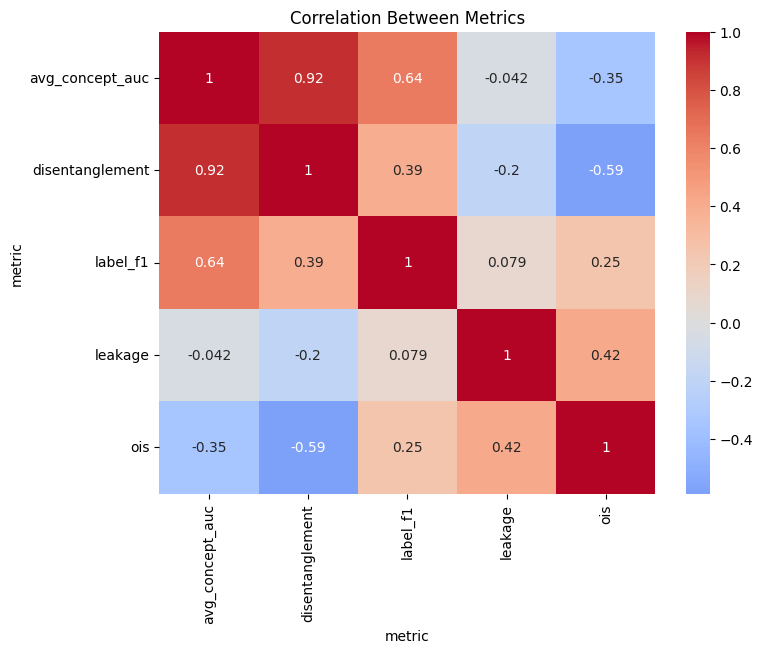

In [47]:
# Assuming df has columns: 'dataset', 'model', 'metric', 'value'
df_wide = df.pivot_table(index=['dataset', 'model'], columns='metric', values='value')
#print(df_wide.head())
corr_matrix = df_wide.corr('spearman')
#print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Metrics')
plt.savefig(f'Correlation Between Metrics.png')
plt.show()


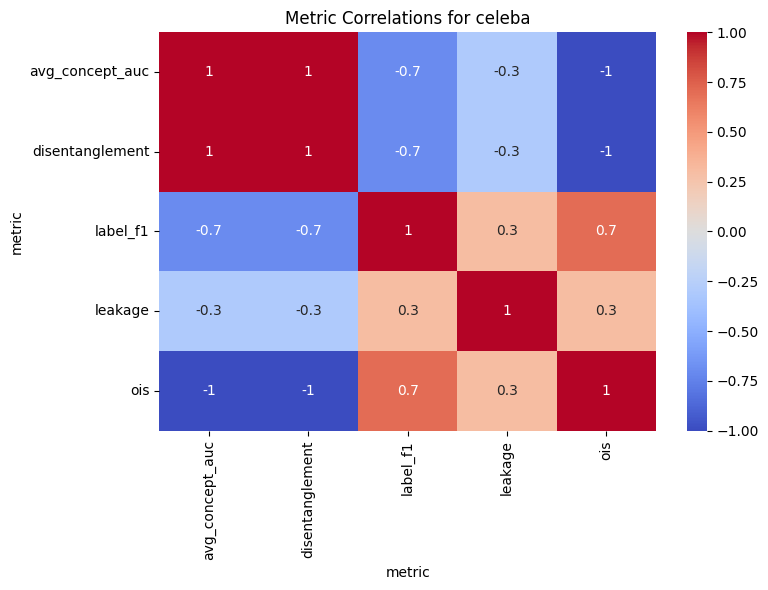

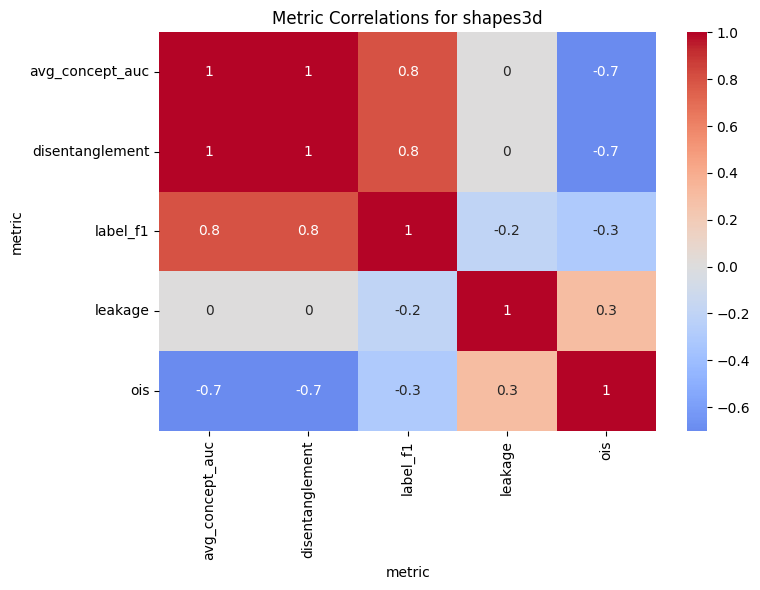

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`

datasets = df['dataset'].unique()

for dataset in datasets:
    df_subset = df[df['dataset'] == dataset]

    # Pivot so each row is a model, each column is a metric
    df_wide = df_subset.pivot(index='model', columns='metric', values='value')

    # Compute correlation between metrics
    corr = df_wide.corr('spearman')

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Metric Correlations for {dataset}')
    plt.savefig(f'Metric Correlations for {dataset}.png')
    plt.tight_layout()
    plt.show()


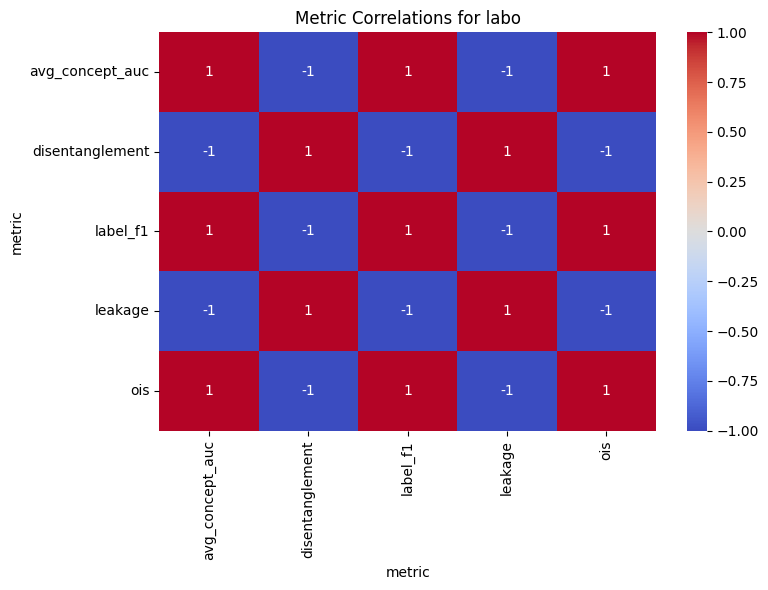

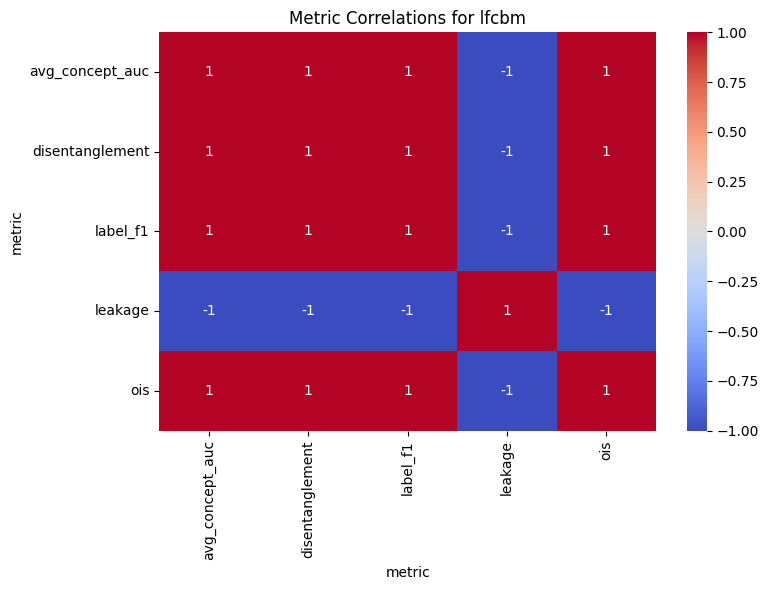

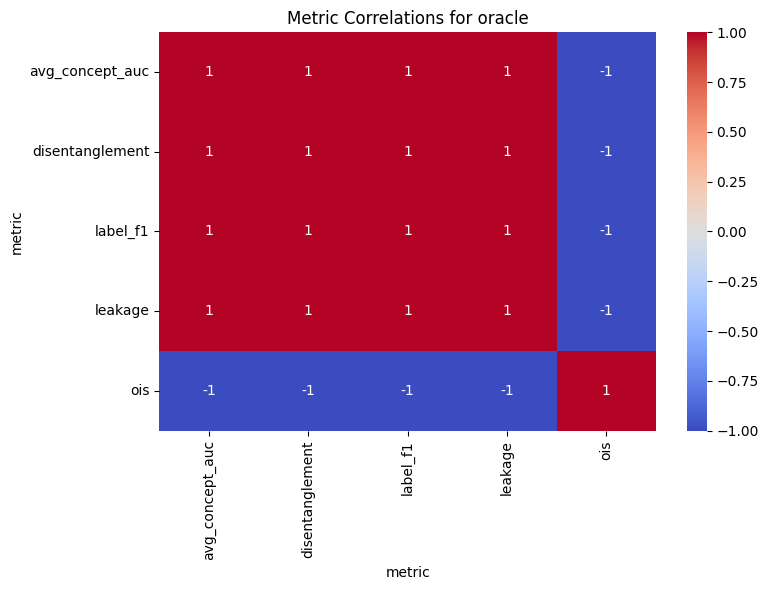

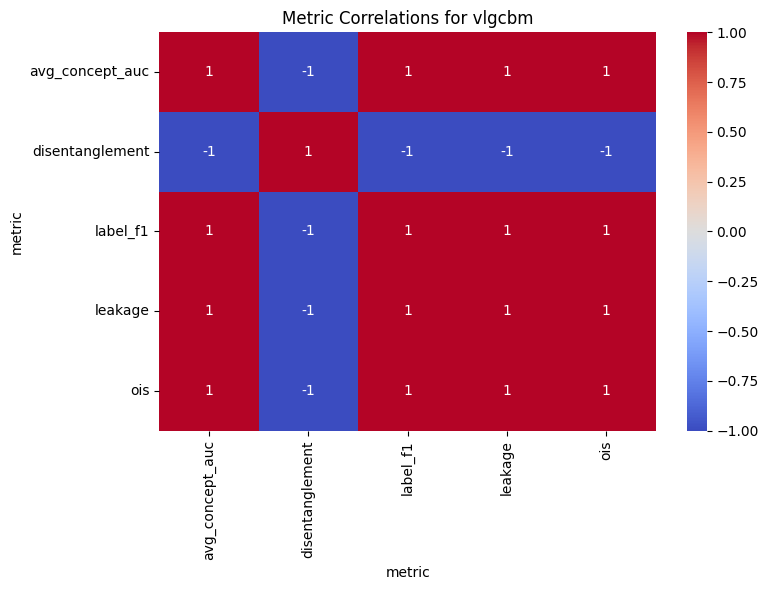

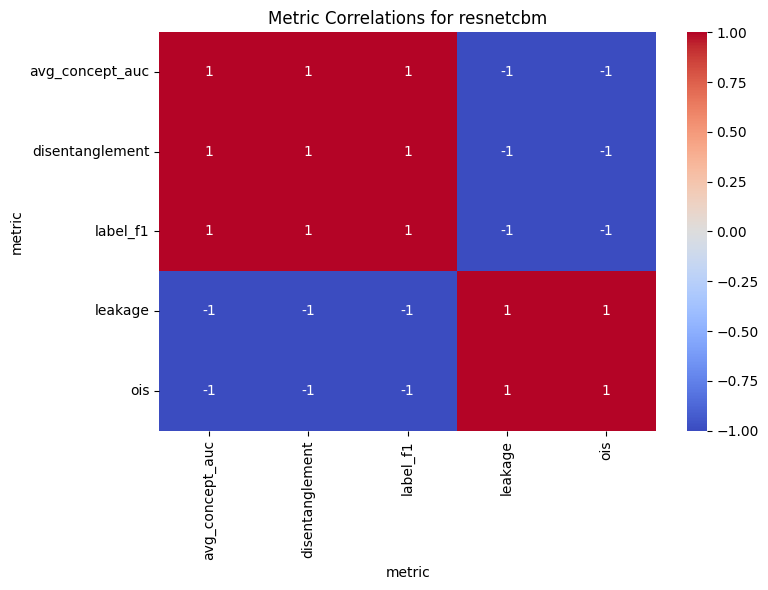

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`

models = df['model'].unique()

for model in models:
    df_subset = df[df['model'] == model]

    # Pivot: rows = dataset, columns = metrics
    df_wide = df_subset.pivot(index='dataset', columns='metric', values='value')

    # Compute correlation between metrics for this model across datasets
    corr = df_wide.corr('spearman')

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Metric Correlations for {model}')
    plt.savefig(f'Metric Correlations for {model}.png')
    plt.tight_layout()
    plt.show()


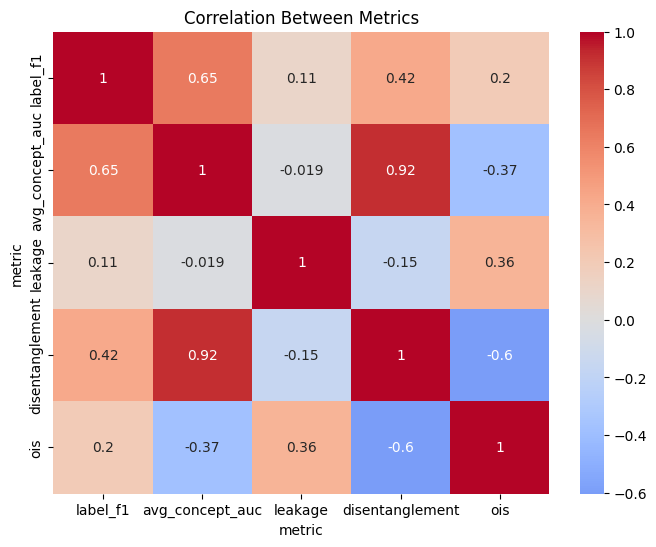

In [50]:
desired_order = ['label_f1', 'avg_concept_auc', 'leakage', 'disentanglement', 'ois']

# Assuming df has columns: 'dataset', 'model', 'metric', 'value'
df_wide = singe_runs.pivot_table(index=['dataset', 'model','run'], columns='metric', values='value')
#print(df_wide.head())
corr_matrix = df_wide.corr('spearman')
ordered_corr = corr_matrix.loc[desired_order, desired_order]
#print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Metrics')
plt.savefig(f'Correlation Between Metrics.png')
plt.show()

In [51]:
# All values for a specific model and dataset
singe_runs[(singe_runs['dataset'] == 'celeba') & (df['model'] == 'labo')]

# Pivot to see metrics in columns
singe_runs.pivot(index=['dataset', 'model','run'], columns='metric', values='value')

metric               avg_concept_auc  disentanglement  label_f1   leakage  \
dataset  model  run                                                         
celeba   labo   0           0.382146         0.280486  0.974067  0.478115   
                1           0.380737         0.280486  0.974067  0.478115   
                2           0.381566         0.280486  0.974067  0.478115   
                3           0.385030         0.280486  0.974067  0.478115   
                4           0.381589         0.280486  0.974067  0.478115   
...                              ...              ...       ...       ...   
shapes3d vlgcbm 5           0.237274         0.252027  0.445824  0.372070   
                6           0.222251         0.242426  0.422831  0.226537   
                7           0.235211         0.220020  0.212444  0.298735   
                8           0.232272         0.243085  0.465914  0.422731   
                9           0.233326         0.266537  0.565450  0.319073   

metric                    ois  
dataset  model  run            
celeba   labo   0    0.163687  
                1    0.163687  
                2    0.163687  
                3    0.163687  
                4    0.163687  
...                       ...  
shapes3d vlgcbm 5    0.151208  
                6    0.152306  
                7    0.152187  
                8    0.151967  
                9    0.150639  

[100 rows x 5 columns]

In [ ]:
import pandas as pd

df1 = pd.read_csv('ordered_models_all_runs.csv', sep=';')
df2 = pd.read_csv('rebuttal_models_all_runs.csv', sep=';')
# Find the max run number in df1
max_run = df1['run'].max()

# Offset run in df2
df2['run'] = df2['run'] + max_run + 1  # Ensure no overlap

# Now concatenate
try:
    merged_df = pd.concat([df1, df2], ignore_index=True)
except:
    try:
        merged_df = df1
    except:
        merged_df = df2
desired_order = ['label_f1', 'avg_concept_auc', 'leakage', 'disentanglement', 'ois']
merged_df['metric'] = pd.Categorical(merged_df['metric'], categories=desired_order, ordered=True)
merged_df = merged_df.sort_values(by=['dataset', 'model', 'run', 'metric']).reset_index(drop=True)
desired_order = ['shapes3d', 'celeba', 'cub']
merged_df['dataset'] = pd.Categorical(merged_df['dataset'], categories=desired_order, ordered=True)
merged_df = merged_df.sort_values(by=['dataset', 'model', 'run', 'metric']).reset_index(drop=True)
# All values for a specific model and dataset
merged_df[(merged_df['dataset'] == 'celeba') & (df['model'] == 'labo')]

# Pivot to see metrics in columns
merged_df.pivot(index=['dataset', 'model','run'], columns='metric', values='value')


metric               label_f1  avg_concept_auc   leakage  disentanglement  \
dataset  model  run                                                         
shapes3d labo   0    0.758608         0.312532  0.878554         0.281170   
                1    0.760397         0.314542  0.878554         0.281170   
                2    0.759040         0.315051  0.878554         0.281170   
                3    0.755186         0.312829  0.878554         0.281170   
                4    0.750341         0.313669  0.878554         0.281170   
...                       ...              ...       ...              ...   
cub      vlgcbm 0    0.599543         0.786647  0.058418         0.610159   
                1    0.599572         0.796849  0.057780         0.609590   
                2    0.598932         0.790468  0.058202         0.609977   
                3    0.598334         0.790594  0.059247         0.609815   
                4    0.598296         0.788170  0.059630         0.609614   

metric                    ois  
dataset  model  run            
shapes3d labo   0    0.151560  
                1    0.151560  
                2    0.151560  
                3    0.151560  
                4    0.151560  
...                       ...  
cub      vlgcbm 0    0.099970  
                1    0.099805  
                2    0.099738  
                3    0.099740  
                4    0.099142  

[174 rows x 5 columns]

In [75]:
summary = merged_df.groupby(['dataset', 'model', 'metric'])['value'].agg(['mean', 'std']).reset_index()
summary.pivot(index=['dataset', 'model'], columns='metric', values='mean')

/tmp/ipykernel_438748/571391416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = merged_df.groupby(['dataset', 'model', 'metric'])['value'].agg(['mean', 'std']).reset_index()


metric              label_f1  avg_concept_auc   leakage  disentanglement  \
dataset  model                                                             
shapes3d labo       0.761865         0.313449  0.878554         0.281170   
         lfcbm      0.960928         0.305344  0.721113         0.279690   
         oracle     0.589783         0.283666  0.397975         0.306184   
         resnetcbm  0.999593         0.999984  0.258615         0.998736   
         vlgcbm     0.449612         0.235049  0.254667         0.243285   
celeba   labo       0.973831         0.381792  0.478115         0.280486   
         lfcbm      0.987392         0.414916  0.593943         0.293811   
         oracle     0.873883         0.515800  0.722551         0.380388   
         resnetcbm  0.953310         0.743339  0.506135         0.746574   
         vlgcbm     0.983851         0.310360  0.917490         0.184564   
cub      labo       0.001051         0.364371  0.017175         0.203092   
         lfcbm      0.674180         0.255123  0.110878         0.186908   
         oracle     0.624307         0.390656  0.079562         0.239497   
         resnetcbm  0.686652         0.899756  0.240126         0.749308   
         vlgcbm     0.598935         0.790546  0.058655         0.609831   

metric                   ois  
dataset  model                
shapes3d labo       0.151560  
         lfcbm      0.152040  
         oracle     0.147869  
         resnetcbm  0.075026  
         vlgcbm     0.151461  
celeba   labo       0.163687  
         lfcbm      0.160050  
         oracle     0.154029  
         resnetcbm  0.125938  
         vlgcbm     0.189672  
cub      labo       0.146717  
         lfcbm      0.163047  
         oracle     0.147172  
         resnetcbm  0.092258  
         vlgcbm     0.099679

In [76]:
summary.pivot(index=['dataset', 'model'], columns='metric', values='std')

metric              label_f1  avg_concept_auc   leakage  disentanglement  \
dataset  model                                                             
shapes3d labo       0.004346         0.001018  0.000000         0.000000   
         lfcbm      0.001357         0.000957  0.010154         0.001092   
         oracle     0.096696         0.173773  0.203435         0.150673   
         resnetcbm  0.000373         0.000015  0.101490         0.000477   
         vlgcbm     0.094609         0.004875  0.113408         0.010358   
celeba   labo       0.000348         0.002292  0.000000         0.000000   
         lfcbm      0.000224         0.002890  0.009919         0.001763   
         oracle     0.141400         0.005651  0.052088         0.006009   
         resnetcbm  0.021950         0.003641  0.010527         0.003710   
         vlgcbm     0.000588         0.007366  0.028197         0.022940   
cub      labo       0.000127         0.002856  0.000000         0.000000   
         lfcbm      0.002966         0.002438  0.004702         0.002895   
         oracle     0.004138         0.032733  0.013392         0.020640   
         resnetcbm  0.003714         0.002428  0.002823         0.002660   
         vlgcbm     0.000621         0.003892  0.000763         0.000242   

metric                   ois  
dataset  model                
shapes3d labo       0.000000  
         lfcbm      0.000567  
         oracle     0.012094  
         resnetcbm  0.005346  
         vlgcbm     0.000797  
celeba   labo       0.000000  
         lfcbm      0.000771  
         oracle     0.001739  
         resnetcbm  0.001696  
         vlgcbm     0.006589  
cub      labo       0.000000  
         lfcbm      0.000480  
         oracle     0.003303  
         resnetcbm  0.001337  
         vlgcbm     0.000314